Multiple collisions: 2
[-11/5, -8/25, -3/25]
o:\programs\perfect-physics\perfect_physics\_misc.py:101: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()

Multiple collisions: 2
[-8/5, -39/25, 1/25]


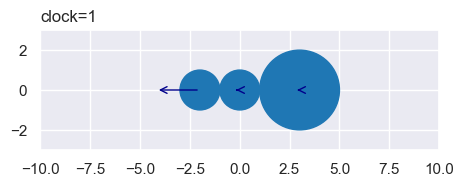

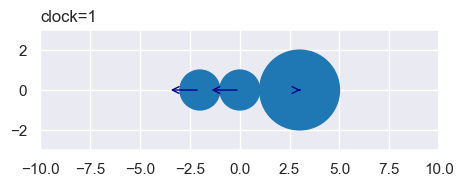

In [17]:
from perfect_physics import World, Circle

world_list = []
for rng,steps in [(0,3),(1,2)]:
    left = Circle(x=-3, y=0, r=1, vx=1, vy=0, m=1, id="left")
    middle = Circle(x=0, y=0, r=1, vx=0, vy=0, m=1, id="middle")
    right = Circle(x=4, y=0, r=2, vx=-1, vy=0, m=4, id="right")
    hint_ssca_list = []
    world = World([left, middle, right], xlim=(-10, 10), ylim=(-3, 3), rng=rng)
    world.run_in_place(steps)
    world_list.append(world)
    print([c.vx for c in world.circle_list])
    world.show()
    pass

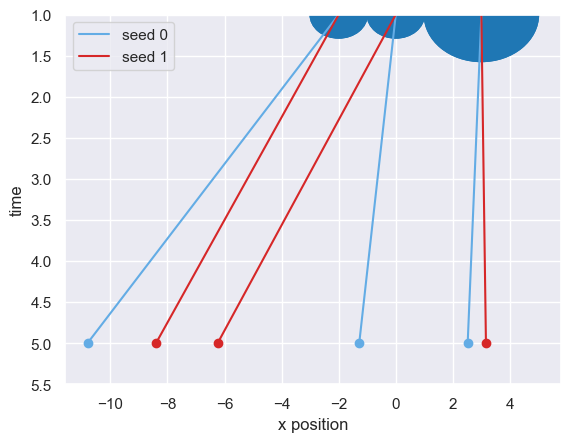

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns

time_range = [1, 5]

figure, axes = plt.subplots()
color_list = [(99/255, 172/255, 229/255), "tab:red", "tab:green"]
t_lin = np.linspace(time_range[0], time_range[1], 100)
for index, world in enumerate(world_list):
    color = color_list[index]
    for circle in world.circle_list:
        x = circle.x + circle.vx * (t_lin - 1)
        plt.ylim(time_range[1]+.5, time_range[0])
        plt.plot(
            x, t_lin, color=color, label=f"seed {index}" if circle.id == "left" else None
        )
        plt.plot(x[-1],t_lin[-1], color=color, marker="o")
        # add labels to x and y
        # plot circles at top?
        plt.xlabel("x position")
        plt.ylabel("time")
        plt.legend()
        axes.add_patch(
            patches.Ellipse(
                (circle.x, circle.y + 1), circle.r * 2, circle.r / 1.75, color="tab:blue"
            )
        )
        pass
    pass

[-2.20782513 -1.58012345]
(-10.8, 5)
(-8.4, 5)
-10.8313005106397 -8.32049379893857 4.95 5.05


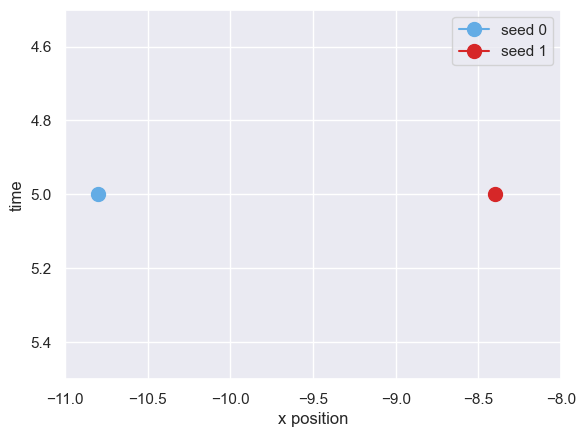

(-10.8, 5)
(-8.4, 5)
-10.8313005106397 -8.32049379893857 4.95 5.05


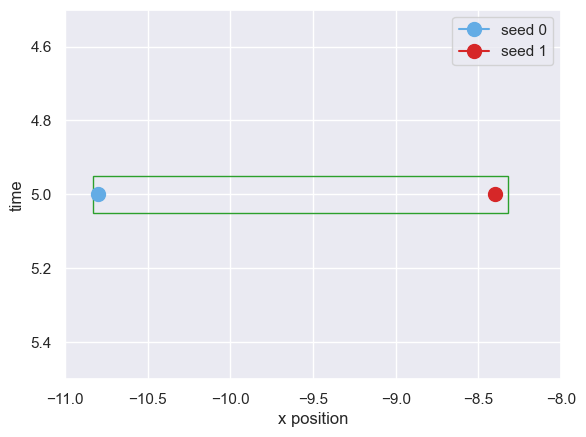

In [82]:
from sympy import sqrt
x_ex = np.array([float(-sqrt(105)/6 - 1/2), float(-sqrt(42)/6 - 1/2)])
print(x_ex)

for with_rec in [False, True]:
    fig, ax = plt.subplots()
    for index, world in enumerate(world_list):
        color = color_list[index]
        left = world.circle_list[0]
        t = time_range[1]
        x = left.x + left.vx * (t - 1)
        print((float(x),t))
        plt.ylim(5.5, 4.5)
        plt.xlim(-11, -8)
        plt.xlabel("x position")
        plt.ylabel("time")
        plt.plot(x,t, color=color, marker="o", label=f"seed {index}", markersize=10)
    # plt.plot(left.x + x_ex * (t-1), [5,5], color="tab:green", label="permissible", linestyle="--")

    x0 = left.x + x_ex[0] * (t-1)
    x1 = left.x + x_ex[1] * (t-1)
    y0 =  4.95
    y1 =  5.05
    print(x0,x1,y0,y1)
    rect = patches.Rectangle((x0, y0), x1-x0 , y1-y0, edgecolor="tab:green", facecolor="none")
    if with_rec:
        ax.add_patch(rect)
    plt.legend()
    plt.show()
